# Kampus Merdeka 6: IBM & Skilvul
# Capstone Project

## Kelompok 34
#### Nama Program Great Otatop

Anggota Kelompok

*   Ghaida' Nada Nazihah
*   M Irsyad Hasbadi
*   Alnindia Lintang Permata Putri
*   Ananda Adi Saputra
*   Rama Dani Wanda Prasetyo

## Problem Definition
Program ini kami berinama Great Otatop, kami membuat program klasifikasi kualitas kentang berdasarkan penyakit, masalah yang ingin diselesaikan adalah mengklasifikasikan kualitas kentang berdasarkan adanya penyakit atau gangguan yang mempengaruhi kondisi dan nilai komersial kentang. Tujuan dari klasifikasi ini adalah untuk memudahkan identifikasi kualitas kentang yang terkena penyakit, yang dapat membantu dalam industri pertanian, perdagangan, atau pemrosesan kentang.

## Latar Belakang:
Kentang adalah salah satu komoditas penting dalam industri pertanian dan dikonsumsi di seluruh dunia. Namun, kentang rentan terhadap berbagai penyakit dan gangguan, seperti penyakit jamur, virus, atau serangan hama. Identifikasi manual penyakit pada kentang dapat menjadi tugas yang rumit dan memakan waktu, serta dapat mengakibatkan kerugian ekonomi yang signifikan. Oleh karena itu, pengembangan program klasifikasi kualitas kentang berdasarkan penyakit dapat membantu dalam mendeteksi dan mengidentifikasi penyakit dengan cepat, sehingga memungkinkan pengambilan keputusan yang lebih efektif dalam pengolahan dan pemasaran kentang.

## Tujuan Penelitian:
Tujuan dari penelitian ini adalah mengembangkan program klasifikasi kualitas kentang berdasarkan penyakit yang dapat mengenali dan mengklasifikasikan kentang berdasarkan adanya penyakit atau gangguan yang mempengaruhi kualitasnya. Dengan menggunakan teknik pembelajaran mesin atau kecerdasan buatan, program ini diharapkan dapat mempelajari pola dari data latihan yang diberikan dan dapat mengklasifikasikan kualitas kentang yang terkena penyakit dengan akurasi yang tinggi. Tujuan lainnya adalah untuk mempermudah proses identifikasi penyakit pada kentang, mengurangi kerugian ekonomi, dan meningkatkan efisiensi dalam berbagai aplikasi yang terkait dengan kualitas kentang.

## Pertanyaan Kunci:

* Bagaimana pendekatan klasifikasi kualitas kentang berdasarkan penyakit
  menggunakan teknik pembelajaran mesin atau kecerdasan buatan dapat membantu dalam identifikasi dan klasifikasi penyakit pada kentang?

* Bagaimana mempersiapkan dataset latihan yang representatif yang mencakup
  berbagai jenis penyakit pada kentang dengan atribut-atribut yang terkait?

* Bagaimana memilih dan mengimplementasikan model pembelajaran mesin yang  
  sesuai untuk tugas klasifikasi kualitas kentang berdasarkan penyakit?

* Bagaimana mengukur kinerja program klasifikasi kualitas kentang yang
  dikembangkan, dan bagaimana meningkatkan akurasi dan efisiensi model?

* Bagaimana menerapkan program klasifikasi kualitas kentang berdasarkan  
  penyakit dalam konteks industri manufaktur di bidang pertanian untuk memberikan atau mempermudah pekerjaan manusia


## Data yang akan dipakai
Dataset yang kami bersumber dari kaggle dengan link sebagai berikut :
??
Adapun deskripsi dari dataset yang kami pakai sebagai berikut :
??

## Jenis Masalah Image Clasification
Dalam kasus klasifikasi kualitas kentang berdasarkan penyakit menggunakan gambar (image classification), jenis masalah yang dihadapi adalah memprediksi atau mengklasifikasikan gambar kentang ke dalam kategori apakah kentang berkualitas atau terjangkit penyakit. Dalam hal ini, tujuan utama adalah untuk mendeteksi dan mengidentifikasi kualitas kentang berdasarkan penyakit pada kentang berdasarkan visualisasi gambar yang mewakili kondisi kentang tersebut.

# Model
Dalam penelitian ini, kami akan menggunakan model CNN (Convolutional Neural Network) untuk membuat program klasifikasi kualitas kentang berdasarkan penyakit

1. Model GPU (Graphics Processing Unit)

# Preparation | Persiapan
## Import Libraries

In [1]:
import os
import random
import pandas as pd
import numpy as np
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from pathlib import Path
from PIL import Image
import cv2
from sklearn.model_selection import train_test_split
!pip install torchinfo
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from torchinfo import summary
import torchvision
from torchvision.models import resnet50, ResNet50_Weights
from sklearn.metrics import accuracy_score, confusion_matrix
from pathlib import Path
from tqdm.auto import tqdm
from collections import OrderedDict
import warnings
warnings.filterwarnings("ignore")

## Get Data | Mendapatkan Data

In [2]:
zip_file_path = "/content/archive.zip"
extract_path = "/content/potato-diseases-datasets"

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

IMAGE_PATH = Path(extract_path)

IMAGE_PATH_LIST = list(IMAGE_PATH.glob("**/*.jpg")) + list(IMAGE_PATH.glob("**/*.jpeg")) + list(IMAGE_PATH.glob("**/*.png"))


## Explore Data (EDA) | Eksplorasi Data

In [3]:
print(f'Total Gambar = {len(IMAGE_PATH_LIST)}')

Total Gambar = 451


#### Penghitungan dan Pemetaan Gambar Berdasarkan Kelas dalam Dataset

In [4]:
CLASSES = os.listdir(IMAGE_PATH)
CLASSES = sorted(CLASSES)

print("==" * 20)
print(" " * 10, f"Total Kelas = {len(CLASSES)}")
print("==" * 20)

for label in CLASSES:
    total_images_class = list(Path(os.path.join(IMAGE_PATH, label)).glob("*.jpg")) + list(Path(os.path.join(IMAGE_PATH, label)).glob("*.jpeg")) + list(Path(os.path.join(IMAGE_PATH, label)).glob("*.png"))
    print(f'* {label}: {len(total_images_class)} images')

           Total Kelas = 7
* Black Scurf: 58 images
* Blackleg: 60 images
* Common Scab: 62 images
* Dry Rot: 60 images
* Healthy Potatoes: 80 images
* Miscellaneous: 74 images
* Pink Rot: 57 images


#### Visualisasi Contoh Gambar dari Setiap Kelas dalam Dataset

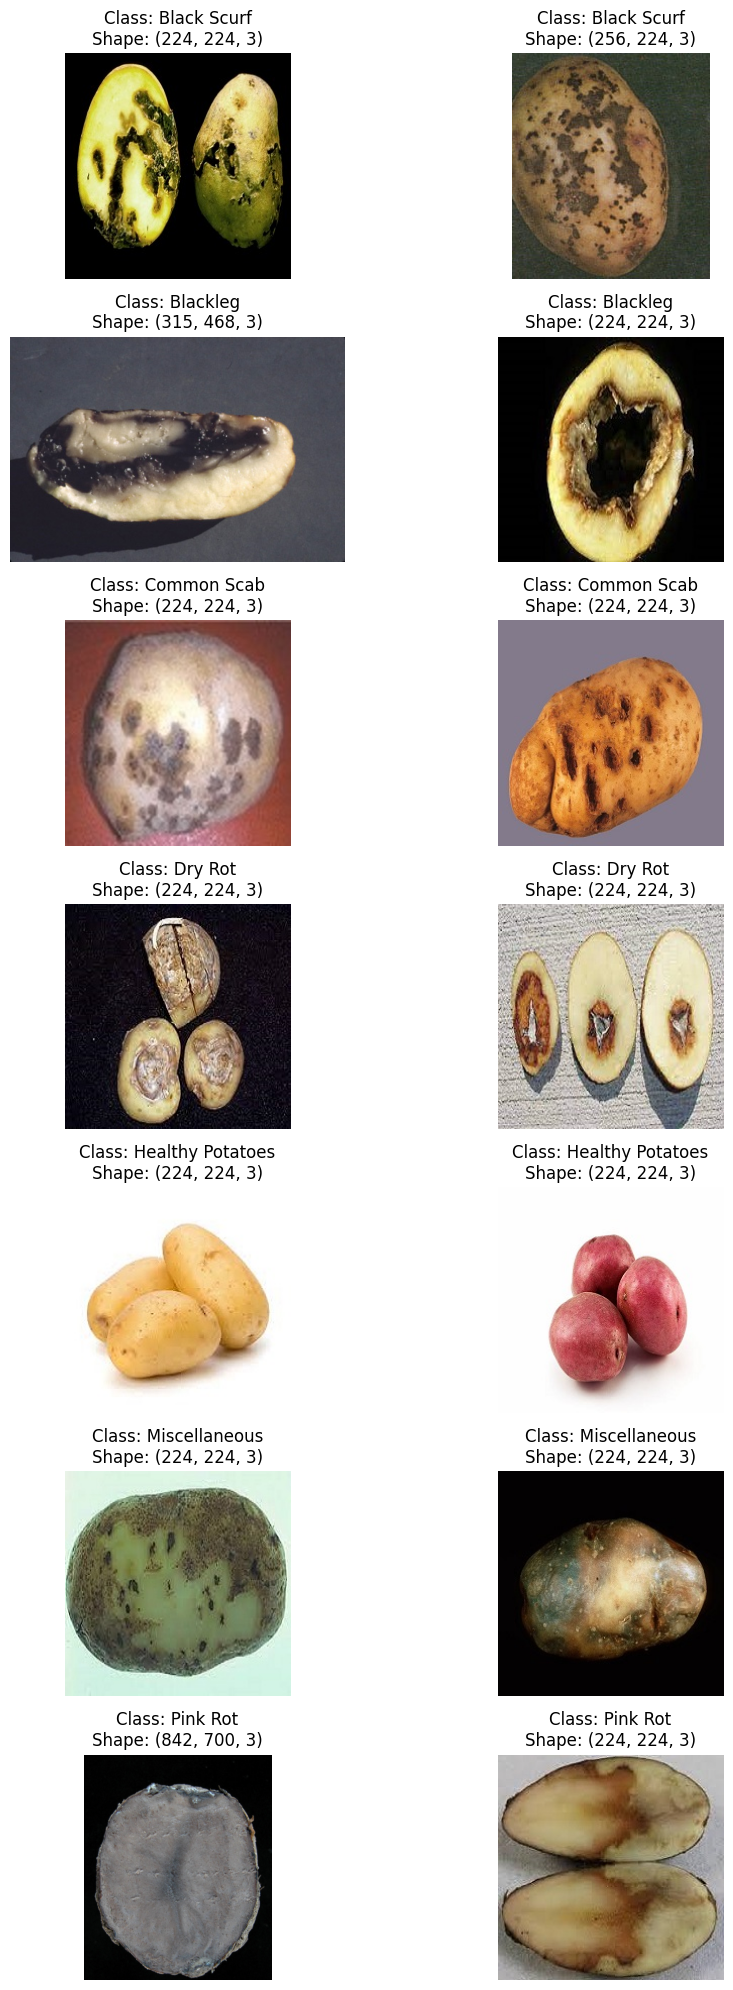

In [5]:
NUM_IMAGES = 2

fig, ax = plt.subplots(nrows = len(CLASSES),
                       ncols = NUM_IMAGES,
                       figsize = (10,20))

p = 0

for label in CLASSES:
    total_images_class = list(Path(os.path.join(IMAGE_PATH, label)).glob("*.jpg")) + list(Path(os.path.join(IMAGE_PATH, label)).glob("*.jpeg")) + list(Path(os.path.join(IMAGE_PATH, label)).glob("*.png"))
    total_images_selected = random.choices(total_images_class, k = NUM_IMAGES)

    for i,img_path in enumerate(total_images_selected):
        img_bgr = cv2.imread(str(img_path))
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        ax[p,i].imshow(img_rgb)
        ax[p,i].axis('off')
        ax[p,i].set_title(f'Class: {label}\nShape: {img_rgb.shape}')

    p += 1

fig.tight_layout()
fig.show()

#### Data Preprocessing

Dalam langkah ini kami mengorganisir dan mengelola informasi mengenai gambar-gambar beserta labelnya ke dalam format yang terstruktur, yaitu dataframe. Dengan menyimpan informasi tersebut dalam dataframe, kami dapat mempermudah saat melakukan manipulasi data, seperti pemrosesan, analisis, atau pelatihan model.

In [6]:
image_paths = [None] * len(IMAGE_PATH_LIST)
labels = [None] * len(IMAGE_PATH_LIST)

for i,img_path in enumerate(IMAGE_PATH_LIST):
    image_paths[i] = img_path
    labels[i] = img_path.parent.stem

data = pd.DataFrame({'Image':image_paths, 'Label':labels})
data.head()

,Image,Label
0,/content/potato-diseases-datasets/Dry Rot/34.jpg,Dry Rot
1,/content/potato-diseases-datasets/Dry Rot/50.jpg,Dry Rot
2,/content/potato-diseases-datasets/Dry Rot/29.jpg,Dry Rot
3,/content/potato-diseases-datasets/Dry Rot/45.jpg,Dry Rot
4,/content/potato-diseases-datasets/Dry Rot/48.jpg,Dry Rot


Pengambilan sampel boostrap untuk meningkatkan jumlah gambar tujuan kami melakukan langkah ini untuk pengambilan sampel dengan penggantian, di mana kami akan secara acak memilih sejumlah gambar dari dataset yang sudah ada, dan kami dapat memilih gambar yang sama lebih dari satu kali.

In [7]:
SEED = 42

num_samples = 10
new_output = [None] * num_samples

for i,sample in enumerate(range(num_samples)):
    new_output[i] = data.sample(n = len(data), replace = True, random_state = SEED)

data_new = pd.concat((new_output), ignore_index = True)
data_new.head()

,Image,Label
0,/content/potato-diseases-datasets/Blackleg/38.jpg,Blackleg
1,/content/potato-diseases-datasets/Pink Rot/27.jpg,Pink Rot
2,/content/potato-diseases-datasets/Healthy Pota...,Healthy Potatoes
3,/content/potato-diseases-datasets/Miscellaneou...,Miscellaneous
4,/content/potato-diseases-datasets/Blackleg/27.jpg,Blackleg


In [8]:
data_new['Label'].value_counts()

Label
Healthy Potatoes    820
Miscellaneous       740
Common Scab         670
Black Scurf         660
Dry Rot             580
Blackleg            550
Pink Rot            490
Name: count, dtype: int64

## Data Splitting

#### Pembagian data menjadi 3
* Data Training
* Data Validation
* Data Testing

In [9]:
data_train, data_rest = train_test_split(data_new,
                                         test_size = 0.3,
                                         random_state = SEED,
                                         stratify = data_new['Label'])

data_val, data_test = train_test_split(data_rest,
                                       test_size = 0.5,
                                       random_state = SEED,
                                       stratify = data_rest['Label'])

Memetakan label dan mengkonversinya menjadi angka

In [10]:
label2id = dict(zip(CLASSES, range(len(CLASSES))))
label2id

{'Black Scurf': 0,
 'Blackleg': 1,
 'Common Scab': 2,
 'Dry Rot': 3,
 'Healthy Potatoes': 4,
 'Miscellaneous': 5,
 'Pink Rot': 6}

Menyiapkan dataset dan data loader untuk data training model

* Dataset

In [11]:
class CustomImageDataset(Dataset):
    def __init__(self, data:pd.DataFrame,
                 transforms,
                 label2id:dict):

        self.data = data
        self.transforms = transforms
        self.label2id = label2id

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        data_new = self.data.copy()
        data_new['Label'] = data_new['Label'].map(self.label2id)

        # Image
        image_path = data_new.iloc[idx, 0]
        image = Image.open(image_path).convert("RGB")
        image = self.transforms(image)

        # Target
        target = data_new.iloc[idx, 1]

        return image, target

Melakukan transformasi untuk menerapkan operasi resizing, cropping, flipping, atau normalisasi untuk meningkatkan kinerja model

In [12]:
weights = ResNet50_Weights.DEFAULT
auto_transforms = weights.transforms()
auto_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[232]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [13]:
train_dataset = CustomImageDataset(data_train, auto_transforms, label2id)

val_dataset = CustomImageDataset(data_val, auto_transforms, label2id)

* Data Loader

In [14]:
BATCH_SIZE = 32

NUM_WORKERS = os.cpu_count()

train_dataloader = DataLoader(dataset = train_dataset,
                              batch_size = BATCH_SIZE,
                              shuffle = True,
                              num_workers = NUM_WORKERS)

val_dataloader = DataLoader(dataset = val_dataset,
                            batch_size = BATCH_SIZE,
                            shuffle = True,
                            num_workers = NUM_WORKERS)

Memvisualisasikan dimensi dari sebuah batch yang akan digunakan dalam proses pelatihan model untuk memahami struktur dan ukuran data yang akan diberikan ke model pada setiap iterasi pelatihan

In [15]:
batch_images, batch_labels = next(iter(train_dataloader))

batch_images.shape, batch_labels.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

# Model Training | Pelatihan Model

In [16]:
DEVICE = "cuda" if torch.cuda.is_available else "cpu"
DEVICE

'cuda'

#### Define Model

In [17]:
model = resnet50(weights = weights)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 163MB/s]


In [18]:
summary(model = model,
        input_size = [32,3,224,224],
        col_names = ['input_size', 'output_size', 'num_params', 'trainable'],
        col_width = 17,
        row_settings = ['var_names'])

Layer (type (var_name))                  Input Shape       Output Shape      Param #           Trainable
ResNet (ResNet)                          [32, 3, 224, 224] [32, 1000]        --                True
├─Conv2d (conv1)                         [32, 3, 224, 224] [32, 64, 112, 112] 9,408             True
├─BatchNorm2d (bn1)                      [32, 64, 112, 112] [32, 64, 112, 112] 128               True
├─ReLU (relu)                            [32, 64, 112, 112] [32, 64, 112, 112] --                --
├─MaxPool2d (maxpool)                    [32, 64, 112, 112] [32, 64, 56, 56]  --                --
├─Sequential (layer1)                    [32, 64, 56, 56]  [32, 256, 56, 56] --                True
│    └─Bottleneck (0)                    [32, 64, 56, 56]  [32, 256, 56, 56] --                True
│    │    └─Conv2d (conv1)               [32, 64, 56, 56]  [32, 64, 56, 56]  4,096             True
│    │    └─BatchNorm2d (bn1)            [32, 64, 56, 56]  [32, 64, 56, 56]  128             

Membekukan ekstraktor layer untuk memastikan parameter-parameter dalam lapisan-lapisan ini tidak akan diperbarui selama proses pelatihan. Dengan kata lain, bobot dan bias di lapisan ekstraktor tidak akan diubah atau disesuaikan saat melatih model.

In [19]:
for param in model.conv1.parameters():
    param.requires_grad = False

for param in model.bn1.parameters():
    param.requires_grad = False

for param in model.layer1.parameters():
    param.requires_grad = False

for param in model.layer2.parameters():
    param.requires_grad = False

for param in model.layer3.parameters():
    param.requires_grad = False

for param in model.layer4.parameters():
    param.requires_grad = False

Pengecekan apakah proses Membekukan ekstraktor layer telah berhasil

In [20]:
summary(model = model,
        input_size = [32,3,224,224],
        col_names = ['input_size', 'output_size', 'num_params', 'trainable'],
        col_width = 17,
        row_settings = ['var_names'])

Layer (type (var_name))                  Input Shape       Output Shape      Param #           Trainable
ResNet (ResNet)                          [32, 3, 224, 224] [32, 1000]        --                Partial
├─Conv2d (conv1)                         [32, 3, 224, 224] [32, 64, 112, 112] (9,408)           False
├─BatchNorm2d (bn1)                      [32, 64, 112, 112] [32, 64, 112, 112] (128)             False
├─ReLU (relu)                            [32, 64, 112, 112] [32, 64, 112, 112] --                --
├─MaxPool2d (maxpool)                    [32, 64, 112, 112] [32, 64, 56, 56]  --                --
├─Sequential (layer1)                    [32, 64, 56, 56]  [32, 256, 56, 56] --                False
│    └─Bottleneck (0)                    [32, 64, 56, 56]  [32, 256, 56, 56] --                False
│    │    └─Conv2d (conv1)               [32, 64, 56, 56]  [32, 64, 56, 56]  (4,096)           False
│    │    └─BatchNorm2d (bn1)            [32, 64, 56, 56]  [32, 64, 56, 56]  (128)   

Memodifikasi jumlah output agar sama dengan jumlah kelas

In [21]:
output_shape = len(CLASSES)

model.fc = nn.Linear(in_features = 2048, out_features = output_shape)

In [22]:
summary(model = model,
        input_size = [32,3,224,224],
        col_names = ['input_size', 'output_size', 'num_params', 'trainable'],
        col_width = 17,
        row_settings = ['var_names'])

Layer (type (var_name))                  Input Shape       Output Shape      Param #           Trainable
ResNet (ResNet)                          [32, 3, 224, 224] [32, 7]           --                Partial
├─Conv2d (conv1)                         [32, 3, 224, 224] [32, 64, 112, 112] (9,408)           False
├─BatchNorm2d (bn1)                      [32, 64, 112, 112] [32, 64, 112, 112] (128)             False
├─ReLU (relu)                            [32, 64, 112, 112] [32, 64, 112, 112] --                --
├─MaxPool2d (maxpool)                    [32, 64, 112, 112] [32, 64, 56, 56]  --                --
├─Sequential (layer1)                    [32, 64, 56, 56]  [32, 256, 56, 56] --                False
│    └─Bottleneck (0)                    [32, 64, 56, 56]  [32, 256, 56, 56] --                False
│    │    └─Conv2d (conv1)               [32, 64, 56, 56]  [32, 64, 56, 56]  (4,096)           False
│    │    └─BatchNorm2d (bn1)            [32, 64, 56, 56]  [32, 64, 56, 56]  (128)   

Menentukan fungsi kerugian (loss function) dan pengoptimal (optimizer).

In [23]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.01, weight_decay = 0.0001)

Mendefinisikan fungsi untuk menjalankan training :
* EarlyStopping
* train_step
* val_step
* predictions

In [24]:
class EarlyStopping:
    def __init__(self, patience:int = 5, delta:float = 0.0001, path = "best_model.pth"):
        self.patience = patience
        self.delta = delta
        self.path = path
        self.best_score = None
        self.counter = 0
        self.early_stop = False

    def __call__(self, val_loss, model):
        if self.best_score is None:
            self.best_score = val_loss
            self.save_checkpoint(model)

        elif val_loss > self.best_score + self.delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True

        else:
            self.best_score = val_loss
            self.save_checkpoint(model)
            self.counter = 0

    def save_checkpoint(self, model):
        torch.save(model.state_dict(), self.path)

In [25]:
early_stopping = EarlyStopping(patience = 20, delta = 0.)

In [26]:
def train_step(model:torch.nn.Module, dataloader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module, optimizer:torch.optim.Optimizer):

    model.train()

    train_loss = 0
    train_accuracy = 0

    for batch,(X,y) in enumerate(dataloader):
        X = X.to(device = DEVICE, dtype = torch.float32)
        y = y.to(device = DEVICE, dtype = torch.long)

        optimizer.zero_grad()

        y_pred_logit = model(X)
        loss = loss_fn(y_pred_logit, y)
        train_loss += loss.item()

        loss.backward()
        optimizer.step()

        y_pred_prob = y_pred_logit.softmax(dim = 1)
        y_pred_class = y_pred_prob.argmax(dim = 1)

        train_accuracy += accuracy_score(y.cpu().numpy(), y_pred_class.detach().cpu().numpy())

    train_loss = train_loss / len(dataloader)
    train_accuracy = train_accuracy / len(dataloader)

    return train_loss, train_accuracy

In [27]:
def val_step(model:torch.nn.Module, dataloader:torch.utils.data.DataLoader,
             loss_fn:torch.nn.Module):

    model.eval()

    val_loss = 0
    val_accuracy = 0


    with torch.inference_mode():
        for batch,(X,y) in enumerate(dataloader):
            X = X.to(device = DEVICE, dtype = torch.float32)
            y = y.to(device = DEVICE, dtype = torch.long)

            y_pred_logit = model(X)
            loss = loss_fn(y_pred_logit, y)
            val_loss += loss.item()

            y_pred_prob = y_pred_logit.softmax(dim = 1)
            y_pred_class = y_pred_prob.argmax(dim = 1)

            val_accuracy += accuracy_score(y.cpu().numpy(), y_pred_class.detach().cpu().numpy())

    val_loss = val_loss / len(dataloader)
    val_accuracy = val_accuracy / len(dataloader)

    return val_loss, val_accuracy

In [28]:
def train(model:torch.nn.Module, train_dataloader:torch.utils.data.DataLoader,
          val_dataloader:torch.utils.data.DataLoader, loss_fn:torch.nn.Module, optimizer:torch.optim.Optimizer,
          early_stopping, epochs:int = 10):

    results = {'train_loss':[], 'train_accuracy':[], 'val_loss':[], 'val_accuracy':[]}

    for epoch in tqdm(range(epochs)):
        train_loss, train_accuracy = train_step(model = model,
                                                dataloader = train_dataloader,
                                                loss_fn = loss_fn,
                                                optimizer = optimizer)

        val_loss, val_accuracy = val_step(model = model,
                                          dataloader = val_dataloader,
                                          loss_fn = loss_fn)

        print(f'Epoch: {epoch + 1} | ',
              f'Train Loss: {train_loss:.4f} | ',
              f'Train Accuracy: {train_accuracy:.4f} | ',
              f'Val Loss: {val_loss:.4f} | ',
              f'Val Accuracy: {val_accuracy:.4f}')


        early_stopping(val_loss, model)

        if early_stopping.early_stop == True:
            print("Early Stopping!!")
            break

        results['train_loss'].append(train_loss)
        results['train_accuracy'].append(train_accuracy)
        results['val_loss'].append(val_loss)
        results['val_accuracy'].append(val_accuracy)

    return results


Pelatihan dengan epoch sebanyak 70 kali

In [ ]:
EPOCHS = 70

torch.cuda.manual_seed(SEED)
torch.manual_seed(SEED)

RESULTS = train(model.to(device = DEVICE),
                train_dataloader,
                val_dataloader,
                loss_fn,
                optimizer,
                early_stopping,
                EPOCHS)

  0%|          | 0/70 [00:00<?, ?it/s]

Epoch: 1 |  Train Loss: 0.2810 |  Train Accuracy: 0.9129 |  Val Loss: 0.0156 |  Val Accuracy: 1.0000
Epoch: 2 |  Train Loss: 0.0216 |  Train Accuracy: 0.9987 |  Val Loss: 0.0052 |  Val Accuracy: 1.0000
Epoch: 3 |  Train Loss: 0.0108 |  Train Accuracy: 1.0000 |  Val Loss: 0.0032 |  Val Accuracy: 1.0000
Epoch: 4 |  Train Loss: 0.0071 |  Train Accuracy: 1.0000 |  Val Loss: 0.0026 |  Val Accuracy: 1.0000
Epoch: 5 |  Train Loss: 0.0055 |  Train Accuracy: 1.0000 |  Val Loss: 0.0015 |  Val Accuracy: 1.0000
Epoch: 6 |  Train Loss: 0.0053 |  Train Accuracy: 1.0000 |  Val Loss: 0.0018 |  Val Accuracy: 1.0000
Epoch: 7 |  Train Loss: 0.0045 |  Train Accuracy: 1.0000 |  Val Loss: 0.0018 |  Val Accuracy: 1.0000
Epoch: 8 |  Train Loss: 0.0043 |  Train Accuracy: 1.0000 |  Val Loss: 0.0013 |  Val Accuracy: 1.0000
Epoch: 9 |  Train Loss: 0.0040 |  Train Accuracy: 1.0000 |  Val Loss: 0.0013 |  Val Accuracy: 1.0000
Epoch: 10 |  Train Loss: 0.0033 |  Train Accuracy: 1.0000 |  Val Loss: 0.0014 |  Val Accura

Visualiasasi perkembangan matrix dan kerugian selama training di lakukan

In [ ]:
def loss_and_metric_plot(results:dict):
    training_loss = results['train_loss']
    valid_loss = results['val_loss']

    training_accuracy = results['train_accuracy']
    valid_accuracy = results['val_accuracy']

    fig,axes = plt.subplots(nrows = 1, ncols = 2, figsize = (9,4))
    axes = axes.flat

    axes[0].plot(range(len(training_loss)), training_loss)
    axes[0].plot(range(len(valid_loss)), valid_loss)
    axes[0].set_xlabel("Epoch", fontsize = 12, fontweight = "bold", color = "black")
    axes[0].set_ylabel("Loss", fontsize = 12, fontweight = "bold", color = "black")
    axes[0].set_title("CrossEntropyLoss", fontsize = 14, fontweight = "bold", color = "blue")

    axes[1].plot(range(len(training_accuracy)), training_accuracy)
    axes[1].plot(range(len(valid_accuracy)), valid_accuracy)
    axes[1].set_xlabel("Epoch", fontsize = 12, fontweight = "bold", color = "black")
    axes[1].set_ylabel("score", fontsize = 12, fontweight = "bold", color = "black")
    axes[1].set_title("Accuracy", fontsize = 14, fontweight = "bold", color = "red")

    fig.tight_layout()
    fig.show()

In [ ]:
loss_and_metric_plot(RESULTS)

Evaluasi Matrix

In [ ]:
def predictions(test_dataloader:torch.utils.data.DataLoader, best_model:str):

    checkpoint = torch.load(best_model)

    loaded_model = resnet50()

    loaded_model.fc = nn.Linear(in_features = 2048,  out_features = output_shape)

    loaded_model.load_state_dict(checkpoint)

    loaded_model.to(device = DEVICE)

    loaded_model.eval()

    y_pred_test = []

    with torch.inference_mode():
        for X,_ in tqdm(test_dataloader):
            X = X.to(device = DEVICE, dtype = torch.float32)
            y_pred_logit = loaded_model(X)
            y_pred_prob = y_pred_logit.softmax(dim = 1)
            y_pred_class = y_pred_prob.argmax(dim = 1)
            y_pred_test.append(y_pred_class.detach().cpu())

    y_pred_test = torch.cat(y_pred_test)

    return y_pred_test

Menyiapkan Dataset dan DataLoader untuk melakukan evaluasi kinerja model pada data uji.

In [33]:
test_dataset = CustomImageDataset(data_test,auto_transforms, label2id)
test_dataloader = DataLoader(dataset = test_dataset,
                             batch_size = BATCH_SIZE,
                             shuffle = False,
                             num_workers = NUM_WORKERS)

In [34]:
# Prediksi
y_pred_test = predictions(test_dataloader, "best_model.pth")

  0%|          | 0/22 [00:00<?, ?it/s]

* Akurasi

In [35]:
test_accuracy = accuracy_score(data_test['Label'].map(label2id), y_pred_test.numpy())

print(f"Accuracy Test = {test_accuracy:.4f}")

Accuracy Test = 1.0000


Confusion Matrix

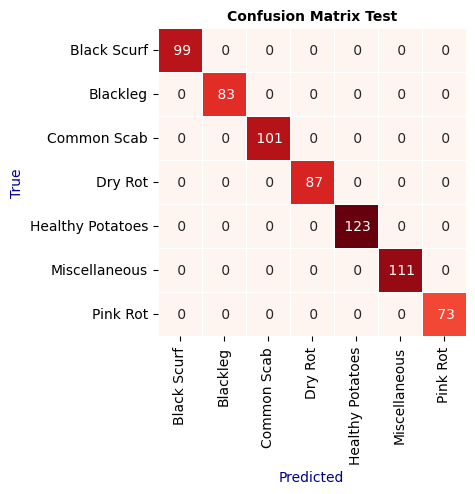

In [36]:
cf_mx_test = confusion_matrix(data_test['Label'].map(label2id), y_pred_test.numpy())

fig,ax = plt.subplots(figsize = (9,4))
sns.heatmap(cf_mx_test, cmap = 'Reds', fmt = ' ', annot = True, cbar = False, square = True, linewidths = 0.4,
            xticklabels = CLASSES, yticklabels = CLASSES, ax = ax)
ax.set_ylabel("True", color = "darkblue")
ax.set_xlabel("Predicted", color = "darkblue")
ax.set_title("Confusion Matrix Test", fontsize = 10, fontweight = "bold", color = "black")

fig.show()

In [37]:
import csv

# Path untuk menyimpan hasil
result_path = 'training_results.csv'

# Menyimpan hasil pelatihan ke dalam file CSV
with open(result_path, 'w', newline='') as csvfile:
    fieldnames = ['epoch', 'train_loss', 'train_accuracy', 'val_loss', 'val_accuracy']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()

    for epoch, (train_loss, train_accuracy, val_loss, val_accuracy) in enumerate(zip(RESULTS['train_loss'], RESULTS['train_accuracy'], RESULTS['val_loss'], RESULTS['val_accuracy'])):
        writer.writerow({'epoch': epoch+1, 'train_loss': train_loss, 'train_accuracy': train_accuracy, 'val_loss': val_loss, 'val_accuracy': val_accuracy})

print("Training results saved to", result_path)


Training results saved to training_results.csv


In [117]:
import torch
from torchvision import models, transforms
from PIL import Image
import cv2
import pandas as pd
from torch.utils.data import Dataset
from google.colab.patches import cv2_imshow  # Import cv2_imshow instead of cv2.imshow

# Mengunduh daftar class names ImageNet
class_names = {
    0: 'Black Scurf',
    1: 'Blackleg',
    2: 'Common Scab',
    3: 'Dry Rot',
    4: 'Healthy Potatoes',
    5: 'Miscellaneous',
    6: 'Pink Rot'
}

In [118]:
# Transformasi gambar
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Ubah ukuran sesuai model
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [119]:
# Fungsi untuk memuat dan memproses gambar
def process_image(image):
    image_tensor = transform(image).unsqueeze(0)  # Tambahkan dimensi batch
    return image_tensor

# Fungsi untuk melakukan prediksi pada gambar
def predict_image(image):
    with torch.no_grad():
        image_tensor = process_image(image)
        output = model(image_tensor)
        probabilities = torch.softmax(output, dim=1)
        _, predicted = torch.max(output, 1)
        return predicted.item(), probabilities.squeeze().tolist()

In [120]:
# Fungsi untuk menampilkan hasil prediksi
def show_prediction_result(image_path):
    image = Image.open(image_path)
    predicted_class, probabilities = predict_image(image)
    predicted_class_name = class_names.get(predicted_class, '')  # Mendapatkan label dari class_names

    # Baca gambar menggunakan OpenCV
    image_cv = cv2.imread(image_path)
    image_cv = cv2.resize(image_cv, (500, 500))

    # Tambahkan teks hasil prediksi ke gambar
    cv2.putText(image_cv, f"Predicted Class: {predicted_class_name}", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    if predicted_class_name != '':
        cv2.putText(image_cv, f"Probabilities: {probabilities[predicted_class]:.4f}", (10, 70),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)

    # Tampilkan gambar menggunakan cv2_imshow
    cv2_imshow(image_cv)


In [121]:
# Fungsi untuk memilih gambar dari file sistem
def choose_image():
    # Menggunakan input dari pengguna untuk path gambar
    file_path = input("Enter the path to the image: ")

    if file_path:
        show_prediction_result(file_path)

In [122]:
# Memanggil fungsi untuk memilih dan menampilkan gambar

# Inisialisasi model ResNet-50 yang sudah dilatih sebelumnya
model = models.resnet50(pretrained=True)
model.eval()  # Mengatur model ke mode evaluasi

# Mengunduh daftar class names ImageNet
class_names = {
    0: 'Black Scurf',
    1: 'Blackleg',
    2: 'Common Scab',
    3: 'Dry Rot',
    4: 'Healthy Potatoes',
    5: 'Miscellaneous',
    6: 'Pink Rot'
}

#Mengubah label kelas menjadi ID kelas
label2id = {'Black Scurf': 0, 'Blackleg': 1, 'Common Scab': 2, 'Dry Rot': 3, 'Healthy Potatoes': 4, 'Miscellaneous': 5, 'Pink Rot': 6}

Enter the path to the image: kentang 1.jpg


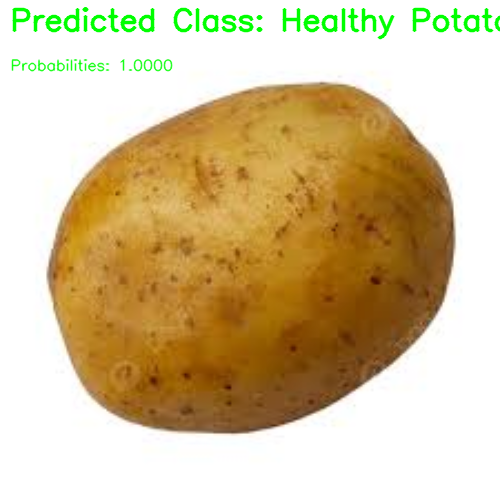

In [123]:
import torch
from torchvision import models, transforms
from PIL import Image
import cv2
import pandas as pd
from torch.utils.data import Dataset
from google.colab.patches import cv2_imshow  # Import cv2_imshow instead of cv2.imshow

# Mengunduh daftar class names ImageNet
class_names = {
    0: 'Black Scurf',
    1: 'Blackleg',
    2: 'Common Scab',
    3: 'Dry Rot',
    4: 'Healthy Potatoes',
    5: 'Miscellaneous',
    6: 'Pink Rot'
}

# Transformasi gambar
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Ubah ukuran sesuai model
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Fungsi untuk memuat dan memproses gambar
def process_image(image):
    image_tensor = transform(image).unsqueeze(0)  # Tambahkan dimensi batch
    return image_tensor

# Fungsi untuk melakukan prediksi pada gambar
def predict_image(image):
    with torch.no_grad():
        image_tensor = process_image(image)
        output = model(image_tensor)
        probabilities = torch.softmax(output, dim=1)
        _, predicted = torch.max(output, 1)
        return predicted.item(), probabilities.squeeze().tolist()

# Fungsi untuk menampilkan hasil prediksi
def show_prediction_result(image_path):
    image = Image.open(image_path)
    predicted_class, probabilities = predict_image(image)
    predicted_class_name = class_names.get(predicted_class, 'Unknown')  # Menggunakan get untuk mendapatkan nilai default

    # Baca gambar menggunakan OpenCV
    image_cv = cv2.imread(image_path)
    image_cv = cv2.resize(image_cv, (500, 500))

    # Tambahkan teks hasil prediksi ke gambar
    cv2.putText(image_cv, f"Predicted Class: {predicted_class_name}", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    if predicted_class_name != 'Unknown':
        cv2.putText(image_cv, f"Probabilities: {probabilities[predicted_class]:.4f}", (10, 70),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)

    # Tampilkan gambar menggunakan cv2_imshow
    cv2_imshow(image_cv)

# Fungsi untuk memilih gambar dari file sistem
def choose_image():
    # Menggunakan input dari pengguna untuk path gambar
    file_path = input("Enter the path to the image: ")

    if file_path:
        show_prediction_result(file_path)

# Definisi class CustomImageDataset
class CustomImageDataset(Dataset):
    def __init__(self, data: pd.DataFrame, transforms, label2id: dict):
        self.data = data
        self.transforms = transforms
        self.label2id = label2id

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Ambil data dari dataframe
        image_path = self.data.iloc[idx, 0]
        label = self.data.iloc[idx, 1]

        # Baca gambar dan lakukan transformasi
        image = Image.open(image_path).convert("RGB")
        image = self.transforms(image)

        # Ubah label menjadi ID kelas
        label_id = self.label2id[label]

        return image, label_id

# Inisialisasi model ResNet-50 yang sudah dilatih sebelumnya
model = models.resnet50(pretrained=False)
num_ftrs = model.fc.in_features
model.fc = torch.nn.Linear(num_ftrs, len(class_names))  # Ganti fully connected layer
model.load_state_dict(torch.load('best_model.pth'))
model.eval()  # Mengatur model ke mode evaluasi

# Memanggil fungsi untuk memilih dan menampilkan gambar
choose_image()
